<a href="https://colab.research.google.com/github/ManuelC13/Restaurador_Imagenes/blob/main/Restaurador_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bloque de código para dibujar la máscara**

1. Sube una imagen desde tu laptop


Saving pareja.jpg to pareja.jpg

2. Dibuja la máscara para procesar la imagen



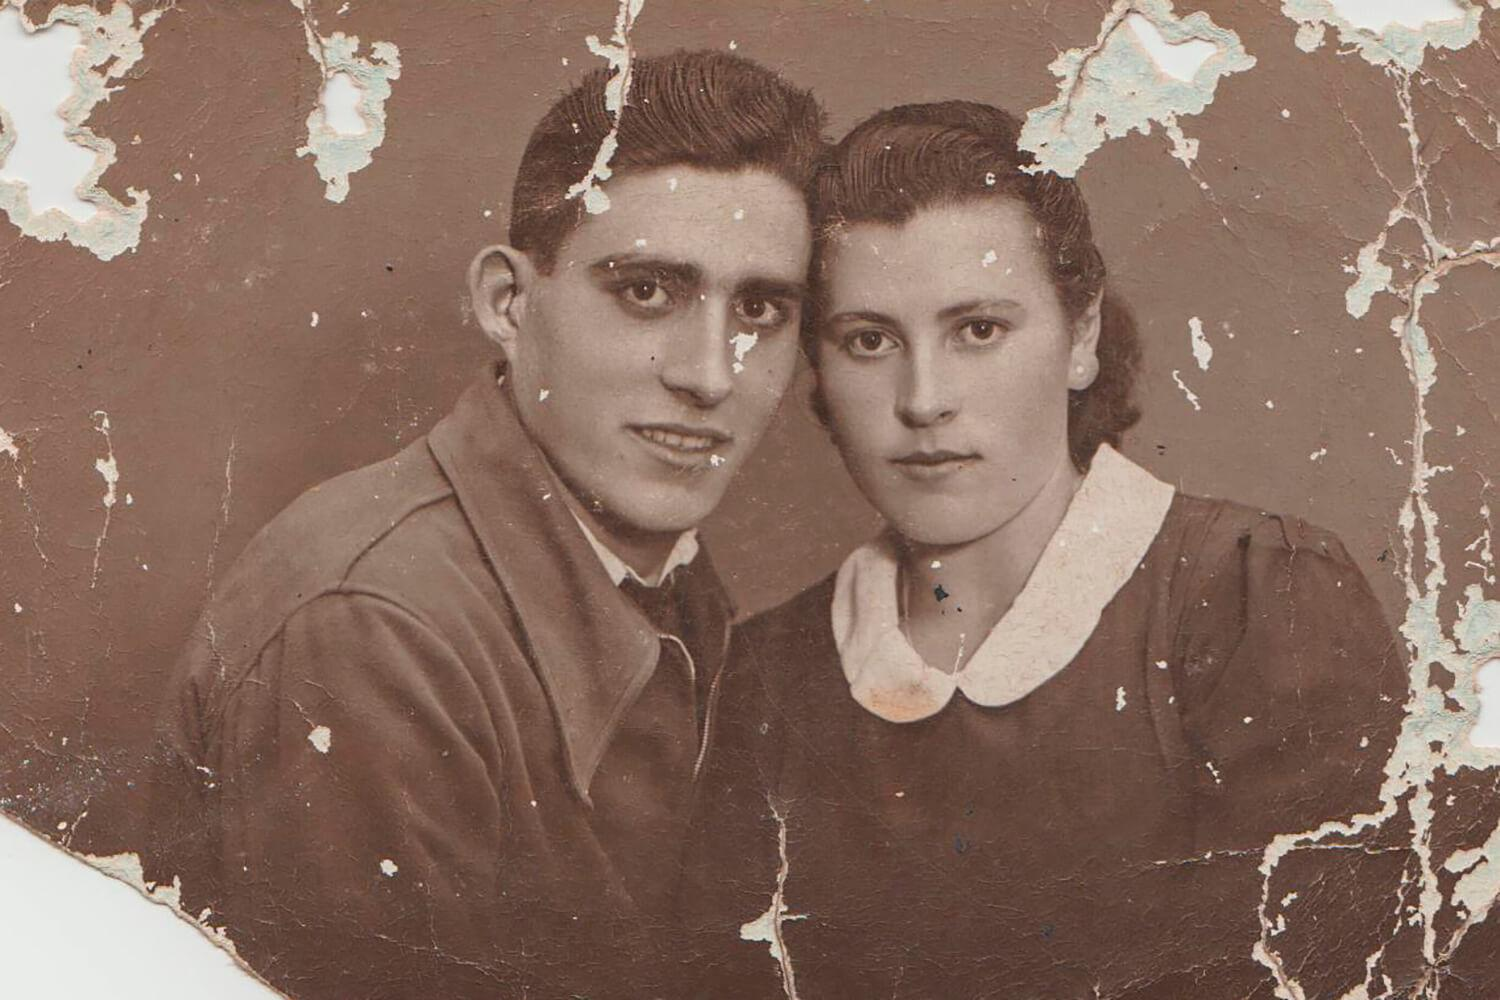

Dibujo guardado en: mascara_pareja.jpg

Comparación de imágenes:


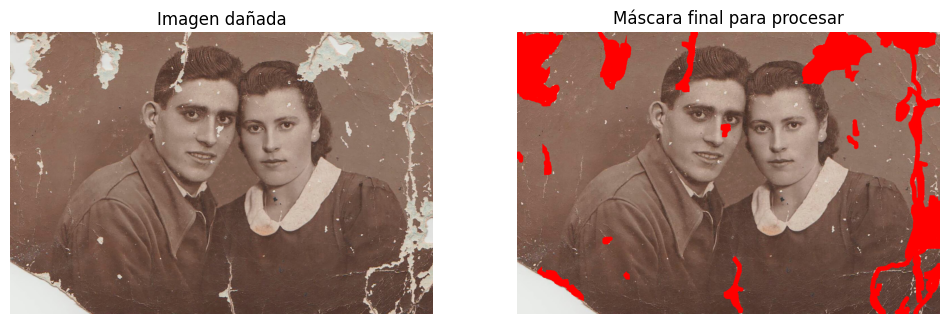

Máscara binaria guardada como: mascara_binaria.png


In [1]:
import base64
import io
import os
from IPython.display import HTML, display
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# Ventana interactiva para pintar la máscara sobre la imagen original
canvas_html = """
<style>
.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}
</style>
<canvas width=%d height=%d></canvas>
<button class="button">Finalizar</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

// Cargar imagen
var img = new Image();
img.src = "data:image/%s;base64,%s";
img.onload = function() {
  ctx.drawImage(img, 0, 0);
};

// Configuración del pincel
ctx.strokeStyle = '%s';
ctx.lineWidth = %d;
ctx.lineCap = 'round';
var isDrawing = false;

// Eventos
canvas.onmousedown = (e) => {
  if (e.offsetX <= %d && e.offsetY <= %d) {
    isDrawing = true;
    ctx.beginPath();
    ctx.moveTo(e.offsetX, e.offsetY);
  }
};

canvas.onmousemove = (e) => {
  if (isDrawing && e.offsetX <= %d && e.offsetY <= %d) {
    ctx.lineTo(e.offsetX, e.offsetY);
    ctx.stroke();
  }
};

canvas.onmouseup = () => isDrawing = false;
canvas.onmouseleave = () => isDrawing = false;

var data = new Promise(resolve => {
  document.querySelector('button').onclick = () => {
    resolve(canvas.toDataURL('image/png'));
  };
});
</script>
"""

"""Crea una copia de la imagen original (dañada) para dibujar sobre ella y no afectarla"""
def crear_copia_imagen(ruta_original):
    ruta_copia = 'copia_' + ruta_original
    with Image.open(ruta_original) as img:
        img.save(ruta_copia)
    return ruta_copia

def dibujar(img_base64, nombre_archivo='dibujo.png', w=None, h=None, line_width=5, brush_color='red'):
    if w is None or h is None:
        img_data = b64decode(img_base64.split(',')[1] if ',' in img_base64 else img_base64)
        with Image.open(io.BytesIO(img_data)) as img:
            w, h = img.size

    display(HTML(canvas_html % (
        w, h,
        nombre_archivo.split('.')[-1],
        img_base64 if not img_base64.startswith('data:') else img_base64.split(',')[1],
        brush_color,
        line_width,
        w - 1, h - 1,
        w - 1, h - 1
    )))

    data = eval_js("data")
    binario = b64decode(data.split(',')[1])
    with open(nombre_archivo, 'wb') as f:
        f.write(binario)
    print(f"Dibujo guardado en: {nombre_archivo}")

def crear_mascara_binaria(ruta_dibujo, salida_mascara='mascara_binaria.png'):
    img = Image.open(ruta_dibujo).convert('RGB')
    mascara = Image.new('L', img.size, 0)
    pixeles = img.load()
    pix_mascara = mascara.load()

    for y in range(img.height):
        for x in range(img.width):
            r, g, b = pixeles[x, y]
            if r > 150 and g < 100 and b < 100:
                pix_mascara[x, y] = 255

    mascara.save(salida_mascara)

    print(f"Máscara binaria guardada como: {salida_mascara}")
    return salida_mascara

def subir_y_preparar_imagen():
    subido = files.upload()
    nombre_imagen = list(subido.keys())[0]

    #Creamos una copia inmediatamente
    nombre_copia = crear_copia_imagen(nombre_imagen)

    with open(nombre_copia, "rb") as archivo_img:
        img_base64 = base64.b64encode(archivo_img.read()).decode('utf-8')

    return img_base64, nombre_imagen, nombre_copia

# -------------------------------------------------- Ejecución-------------------------------------------- ---
print("1. Sube una imagen desde tu laptop")
img_base64, nombre_original, nombre_copia= subir_y_preparar_imagen()

print("\n2. Dibuja la máscara para procesar la imagen")
nombre_salida = 'mascara_' + nombre_original
dibujar(
    img_base64,
    nombre_archivo= nombre_salida,
    line_width=15,
    brush_color='#FF0000'  # Rojo
)

# Mostramos ambas imágenes para verificar
print("\nComparación de imágenes:")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen dañada")
plt.imshow(Image.open(nombre_original))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Máscara final para procesar")
plt.imshow(Image.open(nombre_salida))
plt.axis('off')
plt.show()

mascara_binaria = crear_mascara_binaria(nombre_salida)

#Opcional: Eliminar la copia temporal si no la necesitas
os.remove(nombre_copia)

#**Bloque de código para restaurar la imagen**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.7 MB/s eta 0:00:00

 Cargando imágenes generadas previamente...

 Imágenes generadas previamente:


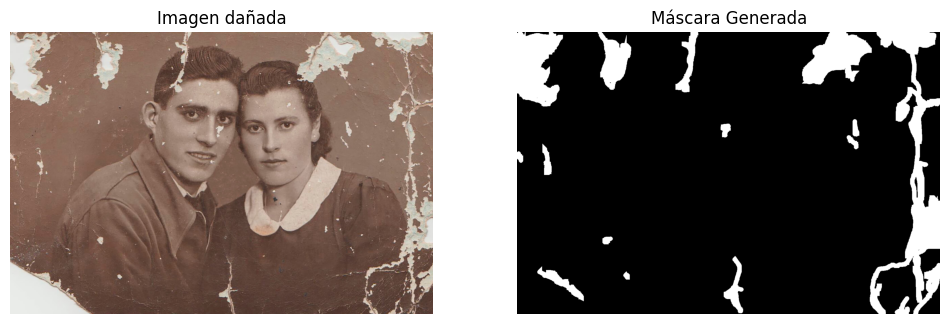


🛠️ Aplicando preprocesamiento...


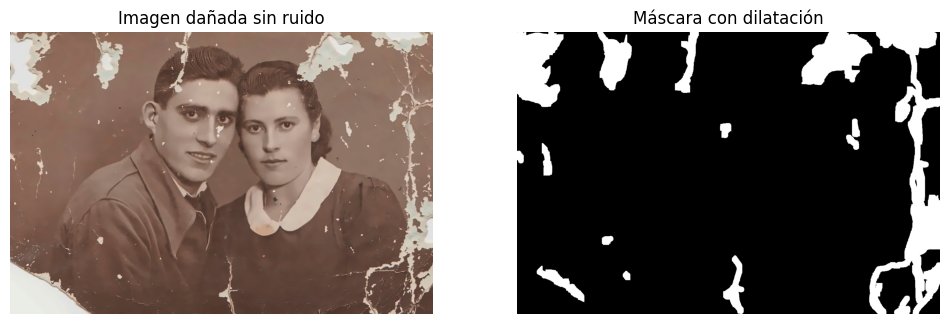


 Cargando modelo Stable Diffusion... (esto puede tomar 2-5 minutos)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]


 Configura los pasos de procesamiento (30-50 recomendable)



¡Listo! Configura los parámetros y haz clic en 'Generar Restauración'


In [2]:
# Instalación de dependencias
!pip install -q diffusers transformers accelerate torch scipy ftfy
!pip install -q opencv-python matplotlib

# Importaciones necesarias
from google.colab import files
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import clear_output
import torch
from diffusers import StableDiffusionInpaintPipeline
from math import ceil

# Función para hacer dimensiones divisibles por 64 (requerimiento del modelo)
def hacer_divisible(imagen, divisor=64):
    """Redimensiona la imagen para que sus dimensiones sean múltiplos del divisor"""
    ancho, alto = imagen.size
    nuevo_ancho = ceil(ancho / divisor) * divisor
    nuevo_alto = ceil(alto / divisor) * divisor
    return imagen.resize((nuevo_ancho, nuevo_alto)), (ancho, alto)

# Función para cargar imágenes
def cargar_imagen(ruta_imagen):
    return Image.open(ruta_imagen).convert("RGB")

def cargar_mascara(ruta_mascara):
    return Image.open(ruta_mascara).convert("L")

# Función para eliminación de ruido
def eliminar_ruido(imagen, intensidad=5):
    imagen_np = np.array(imagen)
    # Si la imagen está en escala de grises
    if len(imagen_np.shape) == 2:
        imagen_filtrada = cv2.fastNlMeansDenoising(imagen_np, None, intensidad, 7, 21)
    else:
        # Si la imagen es a color
        imagen_filtrada = cv2.fastNlMeansDenoisingColored(imagen_np, None, intensidad, intensidad, 7, 21)
    return Image.fromarray(imagen_filtrada)

# Operaciones de morfología matemática
def aplicar_morfologia(imagen, operacion='apertura', tamaño_kernel=3):
    image_np = np.array(imagen)

    kernel = np.ones((tamaño_kernel, tamaño_kernel), np.uint8)

    if operacion == 'cerradura':
        resultado = cv2.morphologyEx(image_np, cv2.MORPH_CLOSE, kernel)
    elif operacion == 'apertura':
        resultado = cv2.morphologyEx(image_np, cv2.MORPH_OPEN, kernel)
    elif operacion == 'dilatacion':
        resultado = cv2.dilate(image_np, kernel, iterations=1)
    else:
        return imagen
    return Image.fromarray(resultado)

# Ecualización de histograma
def ecualizar_histograma(imagen):
    imagen_np = np.array(imagen)

    if len(imagen_np.shape) == 2:  # Imagen en escala de grises
        imagen_ecualizada = cv2.equalizeHist(imagen_np)
        return Image.fromarray(imagen_ecualizada)

    else:  # Imagen color
        imagen_yuv = cv2.cvtColor(imagen_np, cv2.COLOR_RGB2YUV)
        imagen_yuv[:,:,0] = cv2.equalizeHist(imagen_yuv[:,:,0])
        imagen_ecualizada = cv2.cvtColor(imagen_yuv, cv2.COLOR_YUV2RGB)
        return Image.fromarray(imagen_ecualizada)

def mostrar_histogramas(original, ecualizada, titulo="Histogramas"):

    plt.figure(figsize=(12, 6))

    # Mostrar imágenes
    plt.subplot(2, 2, 1)
    plt.title("Original")
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title("Ecualizada")
    plt.imshow(ecualizada)
    plt.axis('off')

    #Mostrar histogramas
    plt.subplot(2, 2, 3)
    plt.title("Histograma Original")
    if len(np.array(original).shape) == 2:
        plt.hist(np.array(original).ravel(), bins=256, color='gray')
    else:
        colores = ('r', 'g', 'b')
        for i, col in enumerate(colores):
            histograma = cv2.calcHist([np.array(original)], [i], None, [256], [0, 256])
            plt.plot(histograma, color=col)

    plt.subplot(2, 2, 4)
    plt.title("Histograma Ecualizado")
    if len(np.array(ecualizada).shape) == 2:
        plt.hist(np.array(ecualizada).ravel(), bins=256, color='gray')
    else:
        colores = ('r', 'g', 'b')
        for i, col in enumerate(colores):
            histograma = cv2.calcHist([np.array(ecualizada)], [i], None, [256], [0, 256])
            plt.plot(histograma, color=col)

    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

# Usamos las imágenes del código anterior
print("\n Cargando imágenes generadas previamente...")
try:
    #Usamos las imagenes originales en lugar de la copia dibujada anteriormente
    imagen = cargar_imagen(nombre_original)
    mascara = cargar_mascara(mascara_binaria)

    # Mostrar imágenes originales
    print("\n Imágenes generadas previamente:")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Imagen dañada")
    plt.imshow(imagen)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Máscara Generada")
    plt.imshow(mascara, cmap='gray')
    plt.axis('off')
    plt.show()

    #---------------------------------------------Aplicar preprocesamiento------------------------------------------------------------
    print("\n🛠️ Aplicando preprocesamiento...")
    # Eliminar ruido de la imagen dañada
    imagen_limpia = eliminar_ruido(imagen)

    # Aplicar morfología a la máscara
    imagen_procesada = aplicar_morfologia(mascara, operacion='dilatacion', tamaño_kernel=5)

    #Mostrar imágenes procesadas
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Imagen dañada sin ruido")
    plt.imshow(imagen_limpia)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Máscara con dilatación")
    plt.imshow(imagen_procesada, cmap='gray')
    plt.axis('off')
    plt.show()

    # Cargar modelo      de Stable Diffusion
    print("\n Cargando modelo Stable Diffusion... (esto puede tomar 2-5 minutos)")

    dispositivo = "cuda" if torch.cuda.is_available() else "cpu"
    modelo = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16,
    ).to(dispositivo)

    #Interfaz para los parámetros de restauración
    print("\n Configura los pasos de procesamiento (30-50 recomendable)")

    #Widgets para la interfaz
    deslizador_pasos = widgets.IntSlider(
        value=40,
        min=20,
        max=50,
        step=5,
        description='Pasos:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    boton_generar = widgets.Button(description="Generar Restauración", button_style='success')
    salida = widgets.Output()

    def on_button_clicked(b):
        with salida:
            clear_output()
            print("\n Generando imagen restaurada... (esto puede tomar 1-3 minutos)")

            # Guardar el tamaño original
            tamaño_original = imagen.size

            # Preparar imagen y máscara para el modelo (dimensiones divisibles por 64)
            imagen_para_modelo, _ = hacer_divisible(imagen_limpia)
            mascara_para_modelo, _ = hacer_divisible(mascara)

            # Asegurarse que la máscara tenga el mismo tamaño que la imagen
            if imagen_para_modelo.size != mascara_para_modelo.size:
                mascara_procesada_redimensionada = mascara_para_modelo.resize(imagen_para_modelo.size)
            else:
                mascara_procesada_redimensionada = mascara_para_modelo

            # Procesar con Stable Diffusion
            with torch.inference_mode():
                resultado = modelo(
                    prompt="same photo, same person, restored, clean, sharp details, photo realistic, no blur, high quality",
                    negative_prompt="text, number, watermark, low quality, blurry, distorted",
                    image=imagen_para_modelo,
                    mask_image=mascara_procesada_redimensionada,
                    num_inference_steps=deslizador_pasos.value,
                    guidance_scale=7.5
                ).images[0]

            # Redimensionar al tamaño original con interpolación de alta calidad
            resultado = resultado.resize(tamaño_original, Image.LANCZOS)

            # Aplicar post-procesamiento
            #resultado_detallado = aplicar_morfologia(resultado, operacion='cerradura', tamaño_kernel=3)

            # Mostrar resultados finales
            print("\n ¡Restauración completada!")
            plt.figure(figsize=(16, 8))

            plt.subplot(1, 2, 1)
            plt.title("Imagen dañada")
            plt.imshow(imagen)
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.title("Imagen Restaurada")
            plt.imshow(resultado)
            plt.axis('off')

            plt.show()

            # Aplicar ecualización de histograma
            print("\n Aplicando ecualización de histograma a la imagen restaurada...")
            resultado_ecualizado = ecualizar_histograma(resultado)
            mostrar_histogramas(resultado, resultado_ecualizado, "Ecualización de la imagen restaurada")

            #Guardar ambas versiones
            ruta_resultado= "imagen_restaurada.png"
            ruta_resultado_ecualizado = "imagen_restaurada_ecualizada.png"

            resultado.save(ruta_resultado)
            resultado_ecualizado.save(ruta_resultado_ecualizado)

            print(f"\n Imágenes guardadas:")
            print(f"- {ruta_resultado} (original restaurada)")
            print(f"- {ruta_resultado_ecualizado} (ecualizada)")

            files.download(ruta_resultado)
            files.download(ruta_resultado_ecualizado)


    boton_generar.on_click(on_button_clicked)

    # Mostrar widgets
    display(widgets.VBox([
        widgets.HBox([deslizador_pasos]),
        boton_generar,
        salida
    ]))

    # Mensaje final
    print("\n¡Listo! Configura los parámetros y haz clic en 'Generar Restauración'")

except NameError:
    print("Error: No se encontraron las imágenes generadas previamente.")
    print("Por favor ejecuta primero el código de dibujo interactivo para generar la imagen y la máscara.")